<a href="https://colab.research.google.com/github/Programacion315/Metodos_Numericos_Problema/blob/main/Trabajo_Final_Metodos_Numericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodos numericos
##Caso #1

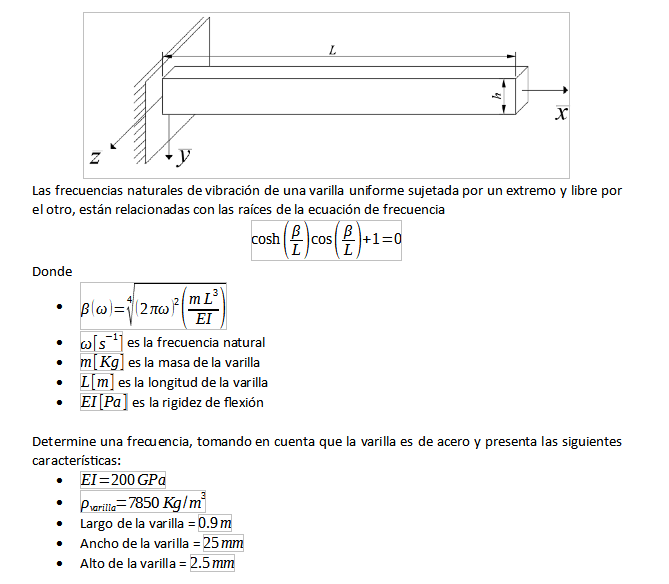

##Funcion a encontrar raices

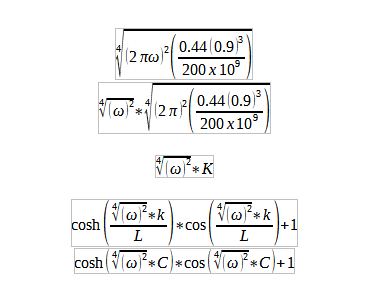

In [30]:
import numpy as np # Librería para cálculo numéricos
import matplotlib.pyplot as plt # Librería para generar gráficos
from google.colab import files # Librería que se utilizará para descargar archivos
import pandas as pd

import random as rd

In [8]:
def rotar (valorC, valorE):
  m = np.zeros((len(valorC),2))
  for j in range (len(valorC)):
    m[j][0] = valorC[j]
    m[j][1] = valorE[j]
  return m

In [9]:
def f(x):
  c = 0.00313
  return np.cosh(c*pow(x**2,1/4))*np.cos(c*pow(x**2,1/4))+1

def df(x):
  c = 0.00313
  x = np.abs(x)
  r = pow(x,1/4)
  return  c*x*(np.cos(c*r)*np.sinh(c*r) - np.cosh(c*r)*np.sin(c*r))/(2*pow(x,3/2))

In [10]:
def error(i,c,c_ant,a,valorC,valorE):
  if i>0:
    abs_e = np.round(np.abs((c-c_ant)/c)*100,4)
    valorC.append(c)
    valorE.append(abs_e)
  else:
    valorC = [a]
    valorE = [100]
  return valorC,valorE

In [11]:
def graficar (valorC, valorE):
  gr = [valorC, valorE]
  l = np.linspace(0,len(valorC),len(valorE))
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  E=['Raices respecto a Iteraciones', ' Medicion de Error respecto a Iteraciones']
  y_tic = ['Raices','Error']
  for i in range(2):
    ax[i].plot(l,gr[i])
    ax[i].grid()
    ax[i].set_title(E[i])
    ax[i].set_xlabel('Iteraciones (I)')
    ax[i].set_ylabel(y_tic[i])

#Codigo biseccion

In [12]:
def Biseccion (a,b,te,valorC = [], valorE = [100]):
  i = 0
  c_ant = 1
  while valorE[-1] >= te:
    c=(a+b)/2
    valorC,valorE = error(i, c, c_ant, a, valorC, valorE)
    c_ant = c
    if c == 0:
      print('la raiz es: ', c)
      break
    elif f(a)*f(c)<0:
      b = c
    elif f(b)*f(c)<0:
      a = c
    i=i+1
  return valorC, valorE

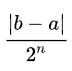

#Metodo falsa posicion

In [13]:
def F_posicion (a,b,te,valorC = [], valorE = [100]):
  i = 0
  c_ant = 1
  while valorE[-1] >= te:
    c = a-(f(a)*(b-a))/(f(b)-f(a))
    valorC,valorE = error(i, c, c_ant, a, valorC, valorE)
    c_ant = c
    if c == 0:
      print('la raiz es: ', c)
      break
    elif f(a)*f(c)<0:
      b = c
    elif f(b)*f(c)<0:
      a = c
    i=i+1
  return valorC, valorE

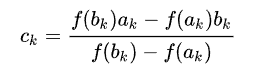

#Metodo azar

In [31]:
def Azar (a,b,te,valorC = [], valorE = [100]):
  i = 0
  c_ant = 1
  while valorE[-1] >= te:
    c= rd.uniform(a,b)
    valorC,valorE = error(i, c, c_ant, a, valorC, valorE)
    c_ant = c
    if c == 0:
      print('la raiz es: ', c)
      break
    elif f(a)*f(c)<0:
      b = c
    elif f(b)*f(c)<0:
      a = c
    i=i+1
  return valorC, valorE

#Newton

In [15]:
def Newton(xi, te, valorC = [], valorE = [100]):
  i = 0
  while valorE[-1] >= te:
    x = xi - f(xi)/df(xi)
    valorC,valorE = error(i, x, xi, x, valorC, valorE)
    if f(x) == 0:
      print('la raiz de la funcion es: ', x, 'iteracion: ', i)
      break
    else:
      xi=x
    i = i + 1
  return valorC, valorE

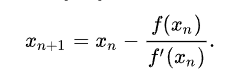

#Secante

In [16]:
def Secante (xi, dx, te,  valorC = [], valorE = [100]):
  i=0
  while valorE[-1] >= te:
    x = xi - (f(xi)*(dx - xi))/(f(dx)-f(xi))
    valorC,valorE = error(i, x, xi, x, valorC, valorE)
    if f(x) == 0:
      print('la raiz de la funcion es: ', x, 'iteracion: ', i)
      break
    else:
      dx = xi
      xi = x
    i=i+1
  return valorC, valorE

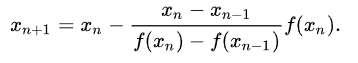

#Punto fijo

In [17]:
f1 = lambda x: f(x)*100000 + x
def p_fijo(xi, te, valorC = [], valorE = [100]):
  i=0
  while valorE[-1] >= te:
    x = f1(xi)
    valorC,valorE = error(i, x, xi, x, valorC, valorE)
    if xi == x:
      print('La raiz es: ', x, 'iteracion', i)
      break
    else:
      xi = x
    i=i+1
  return valorC, valorE

#Implementacion de las funciones

In [18]:
a = 200000
b = 800000

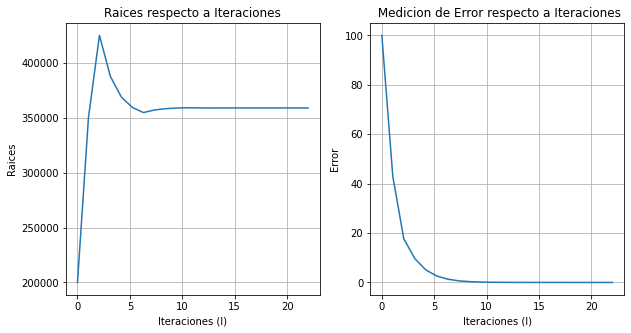

In [19]:
valorC, valorE = Biseccion(a,b,te=0.0001)
graficar(valorC,valorE)

In [20]:
m = rotar(valorC, valorE)
biseccion = pd.DataFrame(m,columns=('raices','Error'))
biseccion.head()

,raices,Error
0,200000.0,100.0000
1,350000.0,42.8571
2,425000.0,17.6471
3,387500.0,9.6774
4,368750.0,5.0847


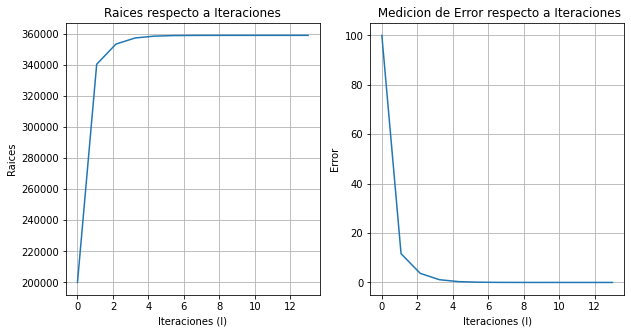

In [21]:
valorC, valorE = F_posicion(a,b,te=0.0001)
graficar(valorC, valorE)

In [22]:
m = rotar(valorC, valorE)
f_posicion = pd.DataFrame(m,columns=('raices','Error'))
f_posicion.head()

,raices,Error
0,200000.000000,100.0000
1,340312.532128,11.6340
2,353260.017437,3.6651
3,357212.892967,1.1066
4,358393.288097,0.3294


## Metodo de newton:
## La sigueinte funcion corresponde a la derivada de la ecuacion dada en el ejericico 
$\dfrac{Cx\cdot\left(\cos\left(C\sqrt{\left|x\right|}\right)\sinh\left(C\sqrt{\left|x\right|}\right)-\cosh\left(C\sqrt{\left|x\right|}\right)\sin\left(C\sqrt{\left|x\right|}\right)\right)}{2\left|x\right|^\frac{3}{2}}$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in sinh
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in cosh
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


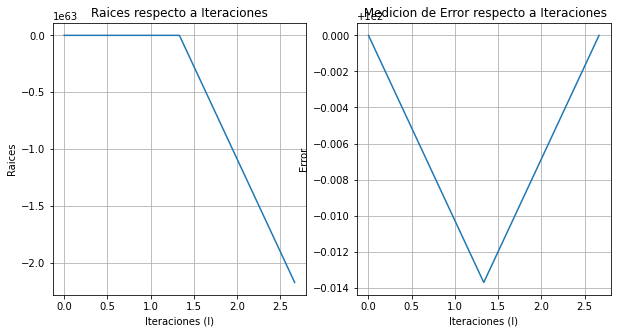

In [23]:
valorC, valorE = Newton(xi = 358900, te = 20)
graficar(valorC, valorE)

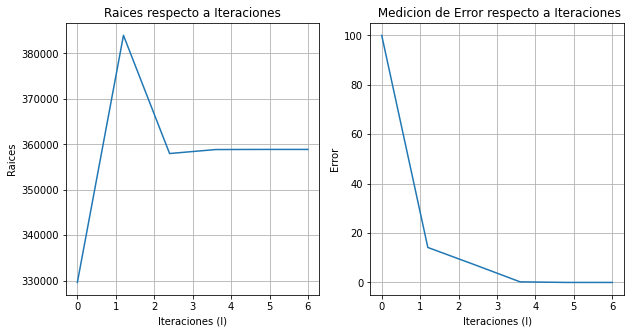

In [24]:
# Este fu el que nosotros elegimos
valorC, valorE = Secante(xi=30000, dx=400000, te=0.0001)
graficar(valorC,valorE)

In [25]:
m = rotar(valorC, valorE)
secante = pd.DataFrame(m,columns=('raices','Error'))
secante.head()

,raices,Error
0,329628.127415,100.0000
1,383985.513138,14.1561
2,357987.674201,7.2622
3,358863.969227,0.2442
4,358890.624232,0.0074


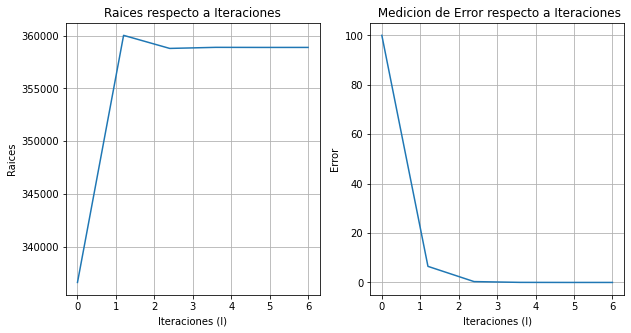

In [26]:
valorC, valorE = p_fijo(xi=200000, te=0.001)
graficar(valorC, valorE)

In [27]:
m = rotar(valorC, valorE)
pfijo = pd.DataFrame(m,columns=('raices','Error'))
secante.head()

,raices,Error
0,329628.127415,100.0000
1,383985.513138,14.1561
2,357987.674201,7.2622
3,358863.969227,0.2442
4,358890.624232,0.0074


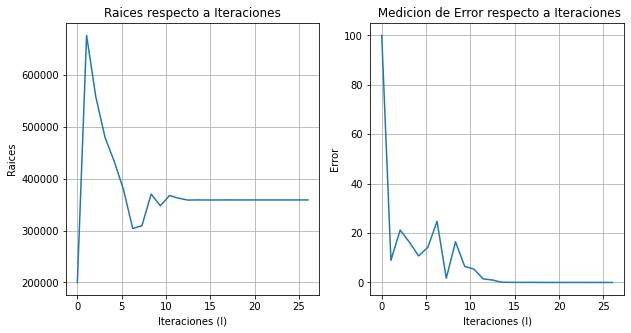

In [38]:
valorC, valorE = Azar(a,b,te=0.0001)
graficar(valorC,valorE)